# Intro Dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data


--- 
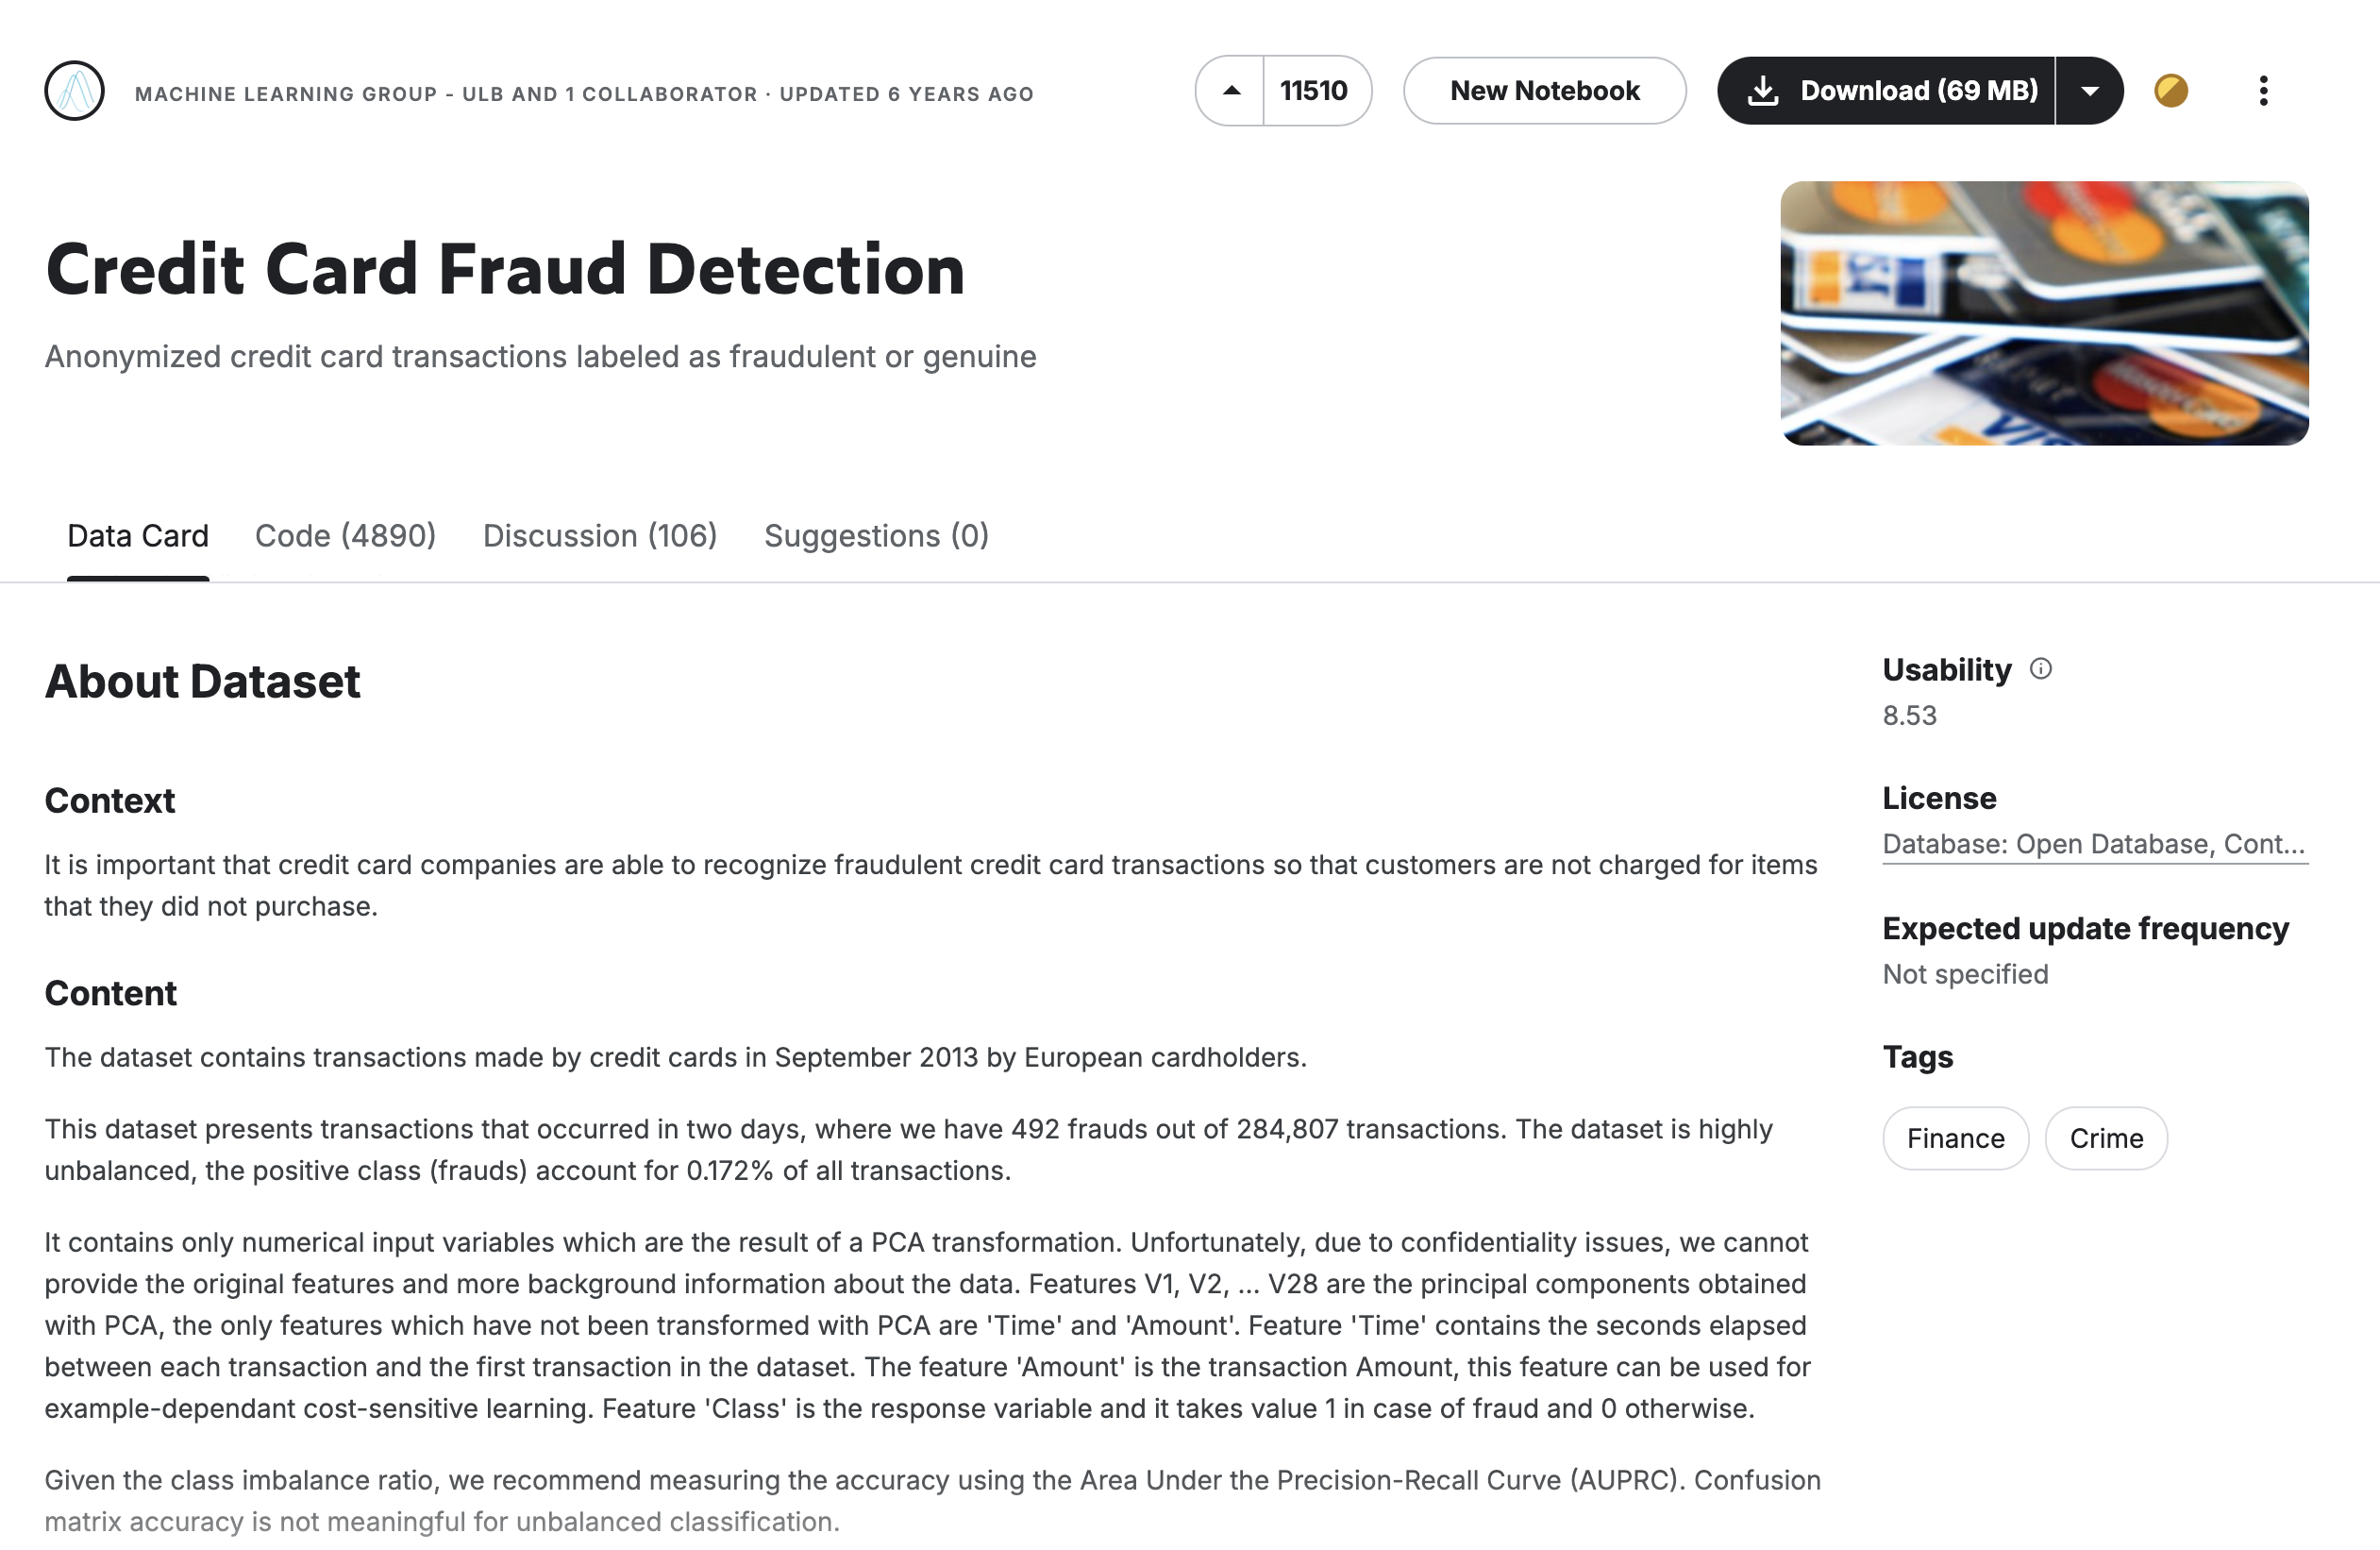

---

# Import libraries

In [1]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression

# Other Libraries
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

# EDA 

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,103353.470908,0.068388,0.005645,-0.166289,-0.035708,0.077589,-0.020708,0.029414,-0.016864,0.053448,...,0.010101,0.028574,0.008640,-0.003830,-0.032287,-0.008292,0.000277,-0.000050,86.636001,0.001725
std,49401.364084,1.983566,1.655407,1.549027,1.442011,1.391182,1.343522,1.254712,1.189538,1.116265,...,0.742265,0.743719,0.620791,0.608455,0.534791,0.481794,0.404723,0.334820,248.210525,0.041496
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-50.943369,-13.434066,...,-22.889347,-9.499423,-36.666000,-2.836627,-8.696627,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,47715.000000,-0.886304,-0.598895,-1.110904,-0.880868,-0.622615,-0.792367,-0.540525,-0.228833,-0.608056,...,-0.230864,-0.540074,-0.158922,-0.362276,-0.354291,-0.331304,-0.072522,-0.056993,5.490000,0.000000
50%,120396.000000,0.046100,0.057423,-0.047760,-0.083962,0.029694,-0.301184,0.068328,0.002366,-0.003020,...,-0.021817,0.040828,-0.001042,0.034222,-0.037751,-0.050890,-0.001457,0.003467,21.330000,0.000000
75%,145248.000000,1.694943,0.811354,0.891752,0.671153,0.697356,0.374565,0.614120,0.306113,0.668548,...,0.201487,0.586078,0.165296,0.454146,0.328473,0.232866,0.092471,0.078447,75.630000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,8.361985,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [4]:
# Good No Null Values!
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Inspect Target

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
df['Class'].value_counts(normalize=True), df['Class'].value_counts()

(Class
 0    0.998275
 1    0.001725
 Name: proportion, dtype: float64,
 Class
 0    227452
 1       393
 Name: count, dtype: int64)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

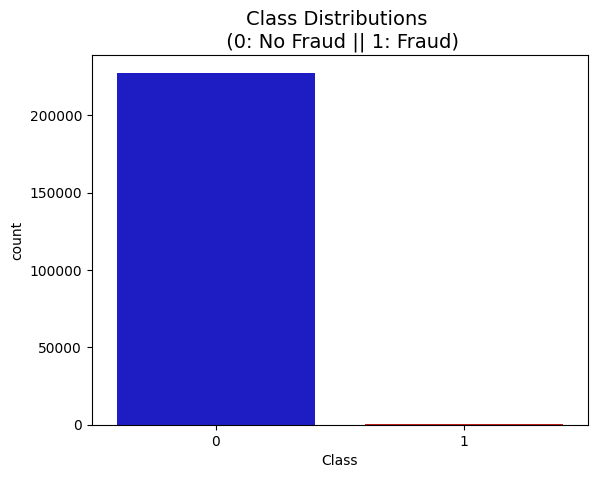

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## Inspect Transaction data

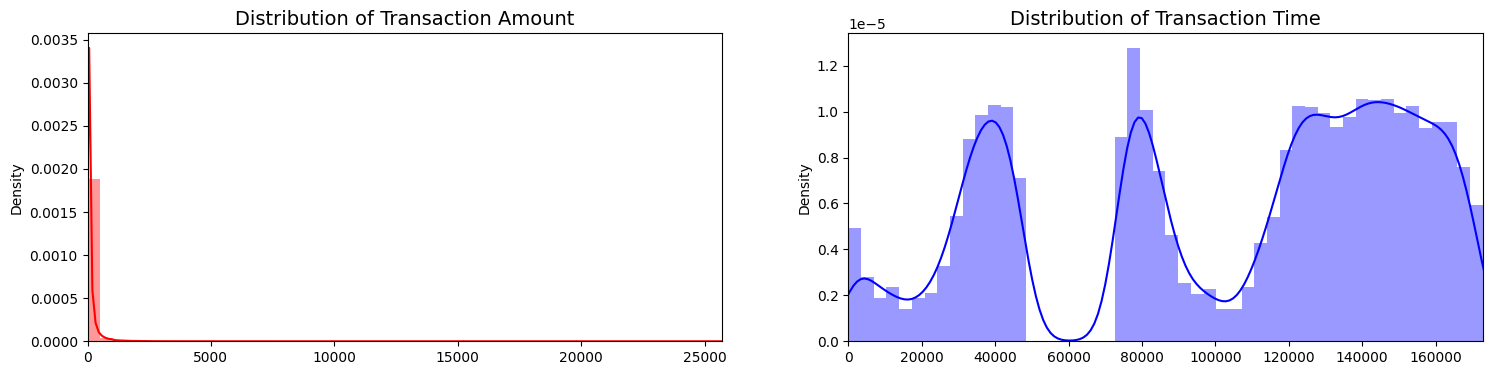

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

## Check Correlation

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

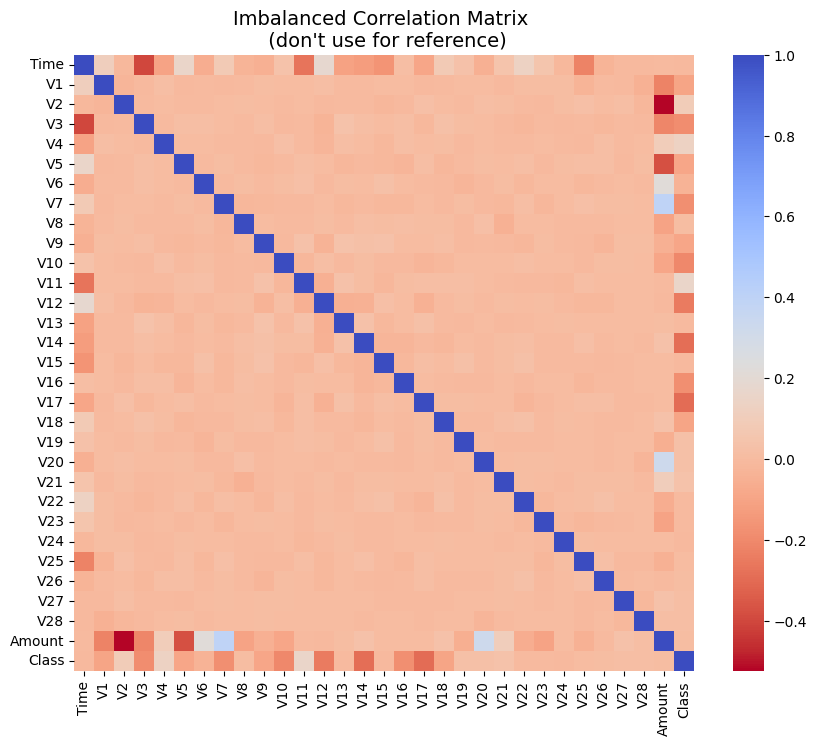

In [10]:
# Make sure we use the subsample in our correlation

f, ax1 = plt.subplots(1, 1, figsize=(10,8))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [11]:
corr['Class'].sort_values()

V17      -0.294158
V14      -0.288188
V12      -0.245619
V10      -0.206719
V3       -0.190536
V7       -0.182830
V16      -0.182113
V1       -0.099730
V18      -0.097399
V9       -0.091617
V5       -0.090866
V6       -0.040655
Time     -0.011840
V24      -0.009765
V15      -0.007810
V13      -0.004351
V23      -0.001998
V22      -0.001147
V25       0.003993
V26       0.006476
Amount    0.007047
V8        0.007110
V28       0.011877
V27       0.013857
V20       0.024564
V19       0.027890
V21       0.036941
V2        0.093136
V4        0.133140
V11       0.155581
Class     1.000000
Name: Class, dtype: float64

As you can see, 

- Top 4 negative correlated features with Class label is: V17, V14, V12, V10

- Top 4 positive correlated features with Class label is: V11, V4, V2, V21

Let's check the boxplots of these features

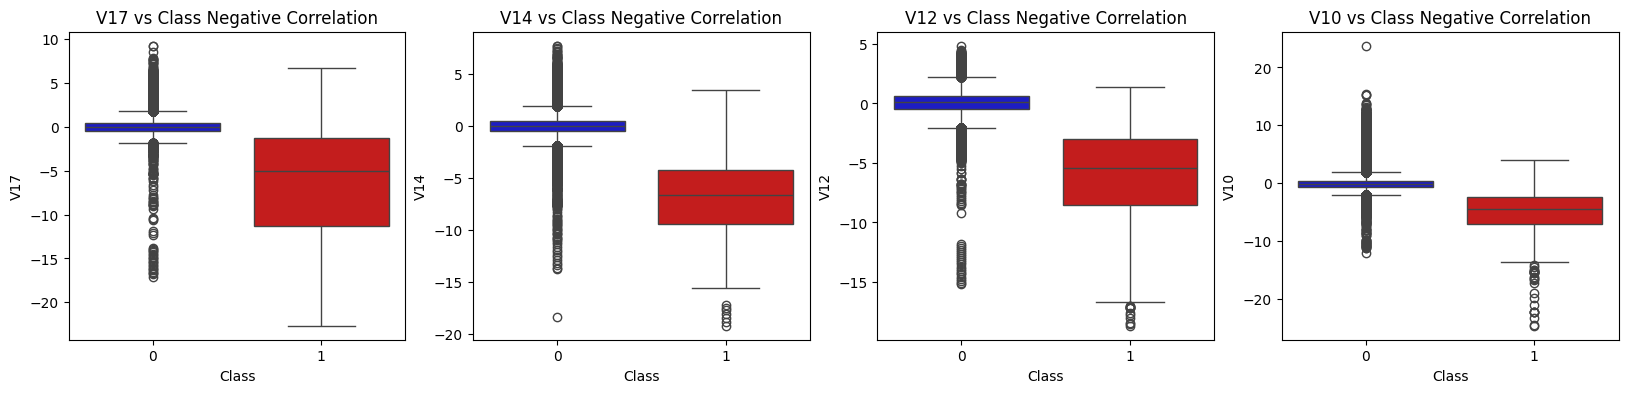

In [12]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

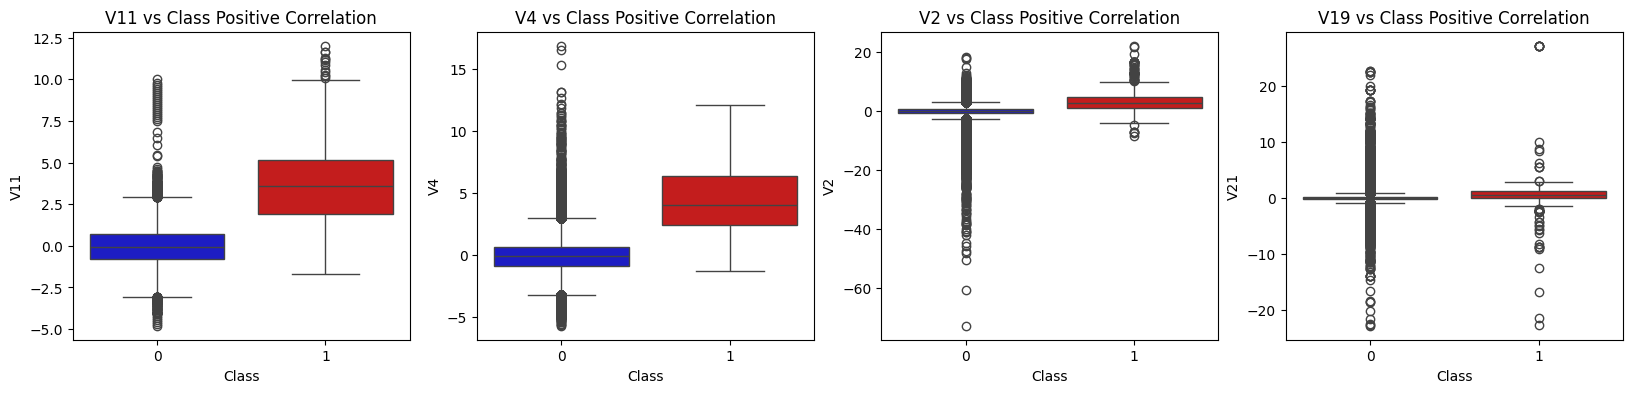

In [13]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V21", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Outlier Removal

### Interquartile Range Method
<li> <b>Interquartile Range (IQR): </b> We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.  </li>
<li> <b>Boxplots: </b> Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme). </li>
</ul>

### Outlier Removal Tradeoff
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.  <br><br>

**The Tradeoff**

The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

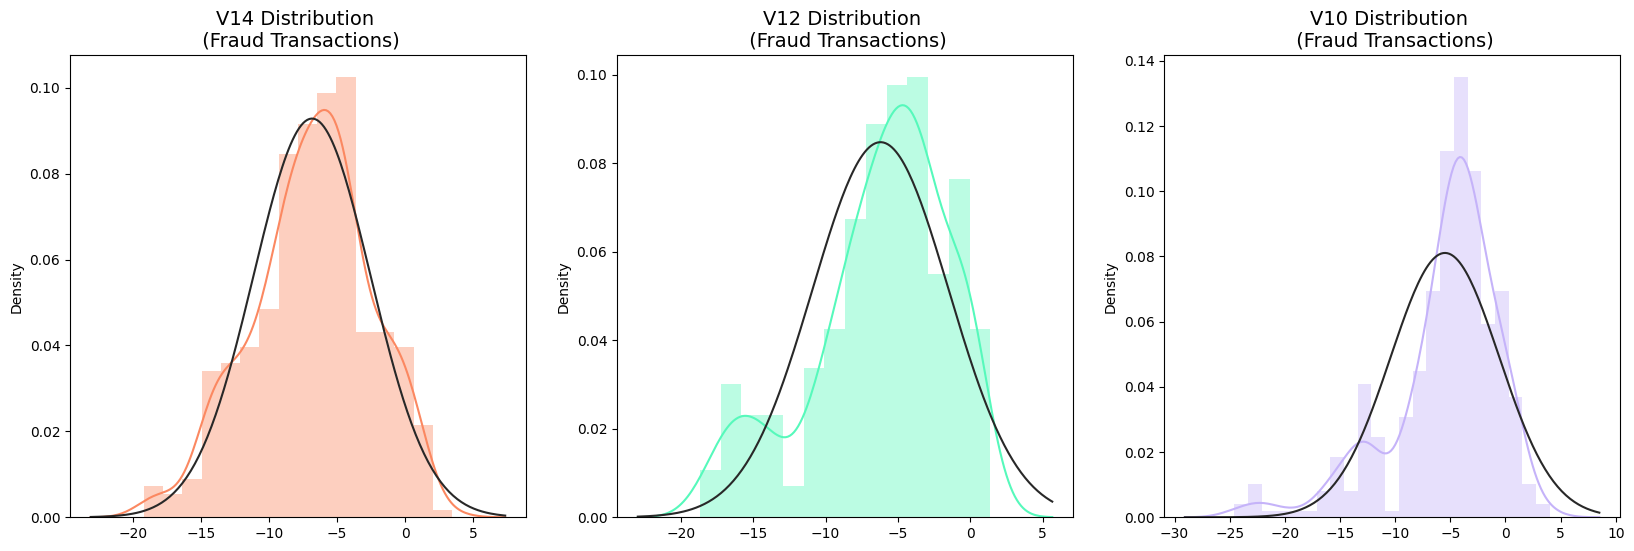

In [14]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [15]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = df['V14'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = df['V12'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = df['V10'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))

Quartile 25: -9.40542306160986 | Quartile 75: -4.21175592358692
iqr: 5.193667138022939
Cut Off: 7.7905007070344094
V14 Lower: -17.19592376864427
V14 Upper: 3.5787447834474895
Feature V14 Outliers for Fraud Cases: 7
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594, -17.7216383537133, -17.4759212828566, -17.230202160711]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -16.9014785301505
V12 Upper: 5.555793649680133
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993, -17.1829184301947, -17.1829184301947, -17.003289445516, -17.003289445516, -17.1504052507291]
Feature V12 Outliers for Fraud Cases: 9
Number of Instances after outliers removal: 227505
---------------------------------------------------------------------------------------------------------------------------------

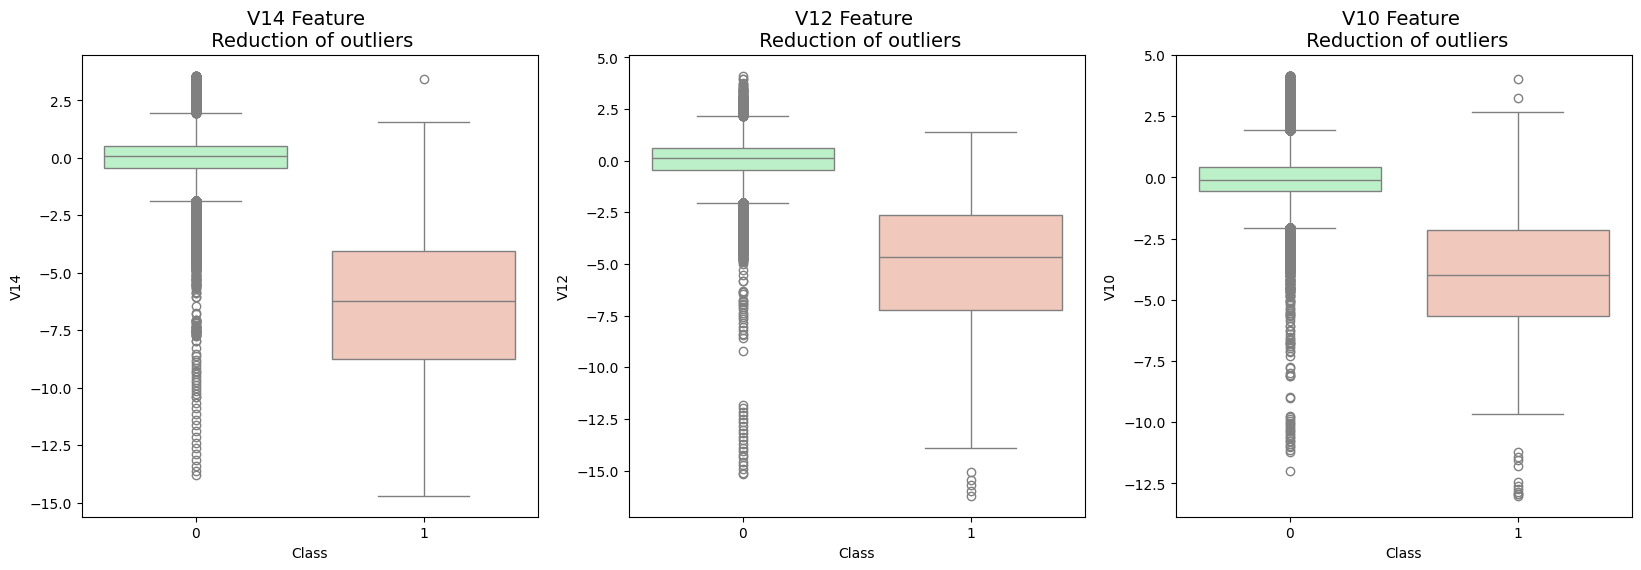

In [16]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

plt.show()

# Load Train/Test Data

For lab purpose, only 8 features are selected:
- Top 4 positive correlated features
- Top 4 negative correlated features

In [17]:
sel_cols = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2', 'V19', 'Class']

In [18]:
train_data = df[sel_cols]
test_data = pd.read_csv('test.csv', index_col=0)[sel_cols]

In [19]:
train_data

,V17,V14,V12,V10,V11,V4,V2,V19,Class
0,0.207971,-0.311169,-0.617801,0.090794,-0.551600,1.378155,-0.072781,0.403993,0
1,-0.114805,-0.143772,1.065235,-0.166974,1.612727,0.448154,0.266151,-0.145783,0
2,1.109969,-0.165946,0.066084,0.207643,0.624501,0.379780,-1.340163,-2.261857,0
3,-0.684093,-0.287924,0.178228,-0.054952,-0.226487,-0.863291,-0.185226,-1.232622,0
4,-0.237033,-1.119670,0.538196,0.753074,-0.822843,0.403034,0.877737,0.803487,0
...,...,...,...,...,...,...,...,...,...
284801,0.070441,-0.731707,0.190916,-0.657422,0.644837,-0.745097,0.931005,0.128904,0
284803,-0.025693,-0.675143,0.915802,-0.975926,-0.150189,-0.738589,-0.055080,-1.545556,0
284804,0.313502,-0.510602,0.063119,-0.484782,0.411614,-0.557828,-0.301254,-0.577252,0
284805,0.509928,0.449624,-0.962886,-0.399126,-1.933849,0.689799,0.530483,2.897849,0


In [20]:
test_data

,V17,V14,V12,V10,V11,V4,V2,V19,Class
30473,-13.277300,-7.687803,-7.099825,-7.524368,2.954344,4.455230,4.382897,3.623332,1
30496,-12.624394,-8.604759,-7.781448,-7.833556,3.657350,5.252842,5.649439,1.645414,1
31002,-12.075932,-8.299660,-7.642983,-7.502112,3.676703,5.902715,5.776516,2.626625,1
33276,-4.698433,-5.274866,-2.719185,-0.794994,3.266066,4.420666,-5.198360,3.025261,1
39183,2.498325,-1.958876,-0.490697,-1.965309,0.159744,1.158253,-1.643541,1.406045,1
...,...,...,...,...,...,...,...,...,...
113962,-0.577135,0.332216,0.695826,0.063819,0.248868,0.971732,-0.018841,0.226805,0
113963,0.210685,-0.152878,0.050803,0.473585,1.365457,0.025736,1.447448,0.631132,0
113964,-0.256869,0.938627,-0.083700,-0.287228,1.072393,0.218270,-2.172836,-0.107207,0
113965,-0.699004,-0.744460,-0.507052,0.285676,0.193389,-1.228047,0.830367,0.260821,0


In [21]:
X_train, y_train = train_data.drop(columns=['Class']), train_data['Class']
X_test, y_test = test_data.drop(columns=['Class']), test_data['Class']

In [22]:
# check again 
X_train.shape, y_train.shape

((225878, 8), (225878,))

In [23]:
X_test.shape, y_test.shape

((56962, 8), (56962,))

In [24]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Model: Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

<b>Classification Metric</b>

In [27]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.58      0.73        99

    accuracy                           1.00     56962
   macro avg       0.99      0.79      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
print(f'Accuracy: {acc * 100:.2f}')
print(f'Precision: {pre* 100:.2f}, Recall: {rec* 100:.2f}, F1-score: {f1* 100:.2f}')

Accuracy: 99.92
Precision: 98.28, Recall: 57.58, F1-score: 72.61


In [31]:
con_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
tn, fp, fn, tp = con_mat.ravel()

In [32]:
tn, fp, fn, tp

(56862, 1, 42, 57)

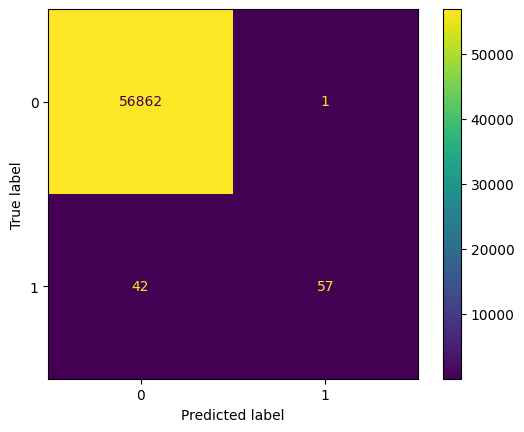

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=model.classes_)
disp.plot()

# Challenge

- Can you do better ? 

- Which metrics will you use and explain why?